<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Для воспроизводимости генерации случайных чисел

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [146]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [147]:
df_train.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.00
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.00
5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.00
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.00
7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.00
8,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.00
9,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01 kmpl,1461 CC,108.45 bhp,248Nm@ 2250rpm,5.00


In [148]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.00
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.00
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.00
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.00
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.00
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.00
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.00
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.00


In [149]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


В тренировочном датасете есть пропуски в столбцах mileage, engine, max_power, torque, seats

In [150]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


В тестовом датасете есть пропуски в тех же столбцах

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [151]:
df_train['seats'].fillna(df_train['seats'].median(), inplace = True)
df_test['seats'].fillna(df_train['seats'].median(), inplace = True)

In [152]:
df_test[df_test['seats'].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


In [153]:
df_test[df_test['seats'].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


Пустых значений в необъектных атрибутах нет

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [154]:
# Удалим целевую переменную
selling_price = df_train['selling_price']
df_train = df_train.drop(['selling_price'], axis = 1)

In [155]:
dubl = df_train.duplicated()

In [156]:
df_train[dubl]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.00
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.00
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.00
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.00
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.00
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.00
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.00


In [157]:
num_duplicates = dubl.sum()
print('Количество дубликатов:', num_duplicates)

Количество дубликатов: 1159


In [158]:
#Удалим повторяющиеся строки
df_train = df_train.drop_duplicates(keep='first')

In [159]:
df_train.shape

(5840, 12)

In [160]:
df_train['selling_price'] = selling_price

In [161]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [162]:
df_train.loc[:, 'mileage_UM'] = df_train['mileage'].apply(lambda x: x.split()[1] if type(x) == str else np.nan)

In [163]:
df_train['mileage_UM'].unique()

array(['kmpl', 'km/kg', nan], dtype=object)

In [164]:
print('Количество незаполненных', (df_train[(df_train['mileage_UM'] != 'kmpl') & (df_train['mileage_UM'] != 'km/kg')]['name'].count()) *100/((df_train['name'].count())), '%')
print('Количество kmpl', df_train[df_train['mileage_UM'] == 'kmpl']['name'].count() *100/((df_train['name'].count())), '%')
print('Количество km/kg', (df_train[(df_train['mileage_UM'] == 'km/kg')]['name'].count()) *100/((df_train['name'].count())), '%')

Количество незаполненных 3.184931506849315 %
Количество kmpl 95.49657534246575 %
Количество km/kg 1.3184931506849316 %


In [165]:
df_train.loc[:, 'mileage_value'] = df_train['mileage'].apply(lambda x: float(x.split()[0]) if type(x) == str else np.nan)

In [166]:
df_train.head(2)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price,mileage_UM,mileage_value
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00,450000,kmpl,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00,370000,kmpl,21.14


Атрибут **mileage_UM** измеряется в 2-х единицах измерения
- kmpl - Kilometers Per Litre (километры на литр) = count(km)/ count(litres)
- km/kg - сколько км может проехать на 1 кг топлива = count(km)/ count(kg)

In [167]:
df_train.loc[:, 'engine_value'] = df_train.loc[:,'engine'].apply(lambda x: float(x.split()[0]) if type(x) == str else np.nan)
df_train.loc[:, 'engine_UM'] = df_train.loc[:,'engine'].apply(lambda x: x.split()[1] if type(x) == str else np.nan)

In [168]:
df_train['engine_UM'].unique()

array(['CC', nan], dtype=object)

In [169]:
print('Количество незаполненных', (df_train[df_train['engine_UM'] != 'CC']['name'].count()) *100/((df_train['name'].count())), '%')
print('Количество CC', df_train[df_train['engine_UM'] == 'CC']['name'].count() *100/((df_train['name'].count())), '%')

Количество незаполненных 3.184931506849315 %
Количество CC 96.81506849315069 %


In [170]:
df_train['max_power'].unique()

array(['74 bhp', '103.52 bhp', '90 bhp', '88.2 bhp', '81.86 bhp',
       '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp', '108.45 bhp',
       '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp', '46.3 bhp',
       '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp', '83.1 bhp',
       '47.3 bhp', '73.8 bhp', '34.2 bhp', '88.5 bhp', '35 bhp',
       '40.3 bhp', '121.3 bhp', '138.03 bhp', '160.77 bhp', '117.3 bhp',
       '116.3 bhp', '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp',
       '98.63 bhp', '175.56 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '120 bhp', '94.68 bhp', '160 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.14 bhp', '83.8 bhp',
       '126.2 bhp', '62.1 bhp', '86.7 bhp', '188 bhp', '214.56 bhp',
       '177 bhp', '148.31 bhp', 

#### Можно заметить, что в датасете присутствуют значения без единицы измерения, учтем это в обработке столбца и напишем функции

In [171]:
def data_UM(x):
    if type(x)==str:
        x = x.split()
        if len(x)==2:
            return x[1]
        else:
            return np.nan
    else:
        return np.nan

In [172]:
def data_value(x):
    if type(x)==str:
        x = x.split()
        try:
            x = float(x[0])
            return x
        except ValueError:
            return np.nan
    else:
        return float(x)

In [173]:
df_train.loc[:, 'max_power_UM'] = df_train['max_power'].apply(data_UM)

In [174]:
df_train.loc[:, 'max_power_value'] = df_train['max_power'].apply(data_value)

In [175]:
print('Количество незаполненных', (df_train[df_train['max_power_UM'] != 'bhp']['name'].count()) *100/((df_train['name'].count())), '%')
print('Количество bhp', df_train[df_train['max_power_UM'] == 'bhp']['name'].count() *100/((df_train['name'].count())), '%')

Количество незаполненных 3.202054794520548 %
Количество bhp 96.79794520547945 %


#Перед удалением атрибута mileage_UM необходимо решить проблему 2-х единиц измерения#

In [176]:
df_train[df_train['mileage_UM'] == 'km/kg']['fuel'].unique()

array(['LPG', 'CNG'], dtype=object)

Заметим, что единица измерения mileage автомобилей на газу km/kg, этот факт уже "зашит" в данных, удалим столбец

Удалим обработанные столбцы

In [177]:
df_train = df_train.drop(columns=['mileage', 'engine', 'max_power', 'torque', 'max_power_UM', 'engine_UM', 'max_power_UM', 'mileage_UM'])

### Проделаем то же самое для df_test ###

In [178]:
df_test.loc[:, 'mileage_UM'] = df_test['mileage'].apply(data_UM)
df_test.loc[:, 'engine_UM'] = df_test['engine'].apply(data_UM)
df_test.loc[:, 'max_power_UM'] = df_test['max_power'].apply(data_UM)

In [179]:
df_test.loc[:, 'mileage_value'] = df_test['mileage'].apply(data_value)
df_test.loc[:, 'engine_value'] = df_test['engine'].apply(data_value)
df_test.loc[:, 'max_power_value'] = df_test['max_power'].apply(data_value)

In [180]:
print('Количество незаполненных', (df_test[(df_test['mileage_UM'] != 'kmpl') & (df_test['mileage_UM'] != 'km/kg')]['name'].count()) *100/((df_test['name'].count())), '%')
print('Количество kmpl', df_test[df_test['mileage_UM'] == 'kmpl']['name'].count() *100/((df_test['name'].count())), '%')
print('Количество km/kg', (df_test[(df_test['mileage_UM'] == 'km/kg')]['name'].count()) *100/((df_test['name'].count())), '%')

Количество незаполненных 1.9 %
Количество kmpl 97.2 %
Количество km/kg 0.9 %


In [181]:
print('Количество незаполненных', (df_test[df_test['engine_UM'] != 'CC']['name'].count()) *100/((df_test['name'].count())), '%')
print('Количество CC', df_test[df_test['engine_UM'] == 'CC']['name'].count() *100/((df_test['name'].count())), '%')

Количество незаполненных 1.9 %
Количество CC 98.1 %


In [182]:
print('Количество незаполненных', (df_test[df_test['max_power_UM'] != 'bhp']['name'].count()) *100/((df_test['name'].count())), '%')
print('Количество bhp', df_test[df_test['max_power_UM'] == 'bhp']['name'].count() *100/((df_test['name'].count())), '%')

Количество незаполненных 1.9 %
Количество bhp 98.1 %


In [183]:
df_test = df_test.drop(columns=['mileage', 'engine', 'max_power', 'torque', 'max_power_UM', 'engine_UM', 'max_power_UM','mileage_UM'])

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [184]:
df_train.rename(columns = {'engine_value': 'engine', 'mileage_value' : 'mileage', 'max_power_value' : 'max_power'}, inplace = True)

In [185]:
df_test.rename(columns = {'engine_value': 'engine', 'mileage_value' : 'mileage', 'max_power_value' : 'max_power'}, inplace = True)

In [186]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5840 entries, 0 to 6996
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   km_driven      5840 non-null   int64  
 3   fuel           5840 non-null   object 
 4   seller_type    5840 non-null   object 
 5   transmission   5840 non-null   object 
 6   owner          5840 non-null   object 
 7   seats          5840 non-null   float64
 8   selling_price  5840 non-null   int64  
 9   mileage        5654 non-null   float64
 10  engine         5654 non-null   float64
 11  max_power      5656 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 593.1+ KB


#### Заполним пустые значения медианной и приведем нужные столбцы к типу int ####

In [187]:
df_train['engine'].fillna(df_train['engine'].median(), inplace=True)
df_train['mileage'].fillna(df_train['mileage'].median(), inplace=True)
df_train['max_power'].fillna(df_train['max_power'].median(), inplace=True)
df_train = df_train.astype({'engine': 'int', 'seats' : 'int', 'mileage' :'float'})

In [188]:
df_test['engine'].fillna(df_train['engine'].median(), inplace=True)
df_test['mileage'].fillna(df_train['mileage'].median(), inplace=True)
df_test['max_power'].fillna(df_train['max_power'].median(), inplace=True)
df_train = df_train.astype({'engine': 'int', 'seats' : 'int'})

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [189]:
pd.options.display.float_format = '{:,.2f}'.format

In [190]:
df_train.describe()

,year,km_driven,seats,selling_price,mileage,engine,max_power
count,"5,840.00","5,840.00","5,840.00","5,840.00","5,840.00","5,840.00","5,840.00"
mean,"2,013.43","73,952.24",5.43,"522,960.09",19.43,"1,429.45",87.91
std,4.10,"60,071.14",0.98,"535,432.00",3.99,485.66,31.64
min,"1,983.00",1.00,2.00,"29,999.00",0.00,624.00,0.00
25%,"2,011.00","39,000.00",5.00,"250,000.00",16.95,"1,197.00",68.00
50%,"2,014.00","70,000.00",5.00,"405,000.00",19.37,"1,248.00",81.86
75%,"2,017.00","100,000.00",5.00,"640,000.00",22.30,"1,498.00",99.00
max,"2,020.00","2,360,457.00",14.00,"10,000,000.00",42.00,"3,604.00",400.00


In [191]:
df_test.describe()

,year,selling_price,km_driven,seats,mileage,engine,max_power
count,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00"
mean,"2,013.68","617,901.04","71,393.34",5.40,19.34,"1,454.88",90.84
std,4.01,"758,553.86","48,486.22",0.91,3.95,522.00,34.89
min,"1,995.00","31,000.00","1,303.00",4.00,0.00,624.00,34.20
25%,"2,011.00","250,000.00","37,000.00",5.00,16.55,"1,197.00",69.00
50%,"2,014.00","434,999.00","61,500.00",5.00,19.37,"1,248.00",82.42
75%,"2,017.00","670,000.00","100,000.00",5.00,22.30,"1,582.00",102.00
max,"2,020.00","6,000,000.00","375,000.00",9.00,32.26,"3,604.00",280.00


In [192]:
df_train.describe(include ='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [193]:
df_test.describe(include ='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [194]:
assert df_train.shape == (5840, 13)

AssertionError: 

### Статистики схожи, разбиение на треин и тест хорошее

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [ ]:
sns.pairplot(df_train)

##### На основе графиков видна связь years, km_driven, engine, max_power с целевой переменной selling_price

In [ ]:
sns.pairplot(df_test)

`Графики похожи, разделение корректно`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [197]:
df_train.corr(numeric_only = True)

,year,km_driven,seats,selling_price,mileage,engine,max_power
year,1.00,-0.37,0.04,0.43,0.34,0.00,0.16
km_driven,-0.37,1.00,0.19,-0.16,-0.18,0.23,0.02
seats,0.04,0.19,1.00,0.15,-0.45,0.65,0.24
selling_price,0.43,-0.16,0.15,1.00,-0.10,0.45,0.69
mileage,0.34,-0.18,-0.45,-0.10,1.00,-0.57,-0.37
engine,0.00,0.23,0.65,0.45,-0.57,1.00,0.68
max_power,0.16,0.02,0.24,0.69,-0.37,0.68,1.00


In [198]:
selling_price = df_train['selling_price']
df_train = df_train.drop('selling_price', axis=1)
df_train.insert(0, 'selling_price', selling_price)

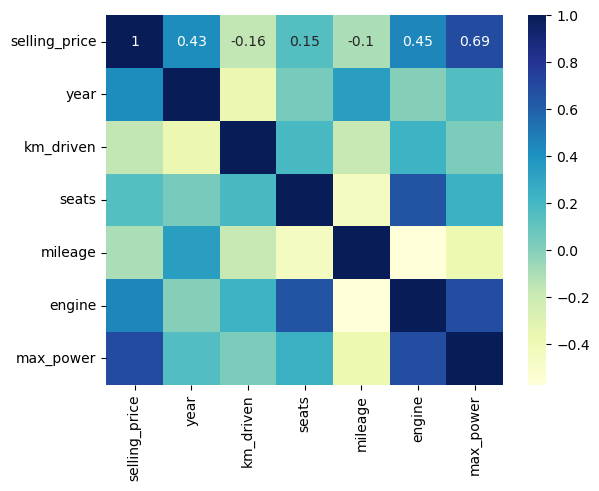

<Figure size 1500x1500 with 0 Axes>

In [199]:
ax = sns.heatmap(df_train.corr(numeric_only = True), annot=True, cmap="YlGnBu")

# Настраиваем размеры графика
plt.figure(figsize=(15, 15))

# Показываем график
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Почти нет корреляции между engine и years; max_power и km_driven`\
`Наибольшая положительная корреляция наблюдается между признаками: selling_price и max_power (0,69); max_power и engine (0,68)`\
`Да, опираясь на данные, видно, что корреляция между km_driven и year отрицательная, следовательно, чем больше год, тем меньше машина проехала и наоборот`

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [200]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [201]:
df_train_real = df_train.select_dtypes(include = ['int', 'float']).copy()
df_test_real = df_test.select_dtypes(include = ['int', 'float']).copy()

In [202]:
y_train = df_train_real['selling_price']
X_train = df_train_real.drop(columns = 'selling_price')

In [203]:
assert X_train.shape == (5840, 6)

In [204]:
y_test = df_test_real['selling_price']
X_test = df_test_real.drop(columns = 'selling_price')

In [81]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [206]:
y_pred_ln = model.predict(X_test)

# Коэфиициенты для тестовой выборки:
r2 = r2_score(y_test, y_pred_ln)
MSE_test = MSE(y_test, y_pred_ln)

y_pred_train = model.predict(X_train)

r2_train = r2_score(y_pred_train, y_train)
MSE_train = MSE(y_train, y_pred_train)

print(f"R^2 на тренировочной выборке: {r2_train:.5f}")
print(f"R^2 на тестовой выборке: {r2:.5f}")

print(f"MSE на тренировочной выборке: {MSE_train:.5f}")
print(f"MSE на тестовой выборке: {MSE_test:.5f}")

R^2 на тренировочной выборке: 0.31155
R^2 на тестовой выборке: 0.59414
MSE на тренировочной выборке: 116874153930.02882
MSE на тестовой выборке: 233298779730.45737


R^2 на тестовой выборке показал лучшие результаты - переобучения нет

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [207]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

columns = X_train.columns
X_train = pd.DataFrame(scaler.transform(X_train), columns = columns)

columns = X_test.columns
X_test = pd.DataFrame(scaler.transform(X_test), columns = columns)

In [208]:
ln = LinearRegression()
ln.fit(X_train, y_train)

LinearRegression()

In [209]:
y_pred_ln_st = ln.predict(X_test)

In [210]:
y_pred_train = ln.predict(X_train)

In [211]:
R_2_test = r2_score(y_test, y_pred_ln_st)
MSE_test = MSE(y_test, y_pred_ln_st)

R_2_train = r2_score(y_train, y_pred_train)
MSE_train = MSE(y_train, y_pred_train)

print(f"R^2 на тренировочной выборке: {R_2_train:.5f}")
print(f"R^2 на тестовой выборке: {R_2_test:.5f}")

print(f"MSE на тренировочной выборке: {MSE_train:.5f}")
print(f"MSE на тестовой выборке: {MSE_test:.5f}")

R^2 на тренировочной выборке: 0.59226
R^2 на тестовой выборке: 0.59414
MSE на тренировочной выборке: 116874153930.02892
MSE на тестовой выборке: 233298779730.44977


### Качество модели улучшилось на тренировочной выборке. На тестовой ничего не изменилось. Сильного прироста в качестве StandartScaler не дал

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [212]:
intercept = ln.intercept_
coefficients = ln.coef_

print(f"Свободный член: {intercept}")
print(f"Коэффициенты: {coefficients}")

Свободный член: 522960.0910958868
Коэффициенты: [152772.57084581 -44158.81852005 -23209.132486    28833.92577752
  61178.49433685 322807.35325923]


<BarContainer object of 6 artists>

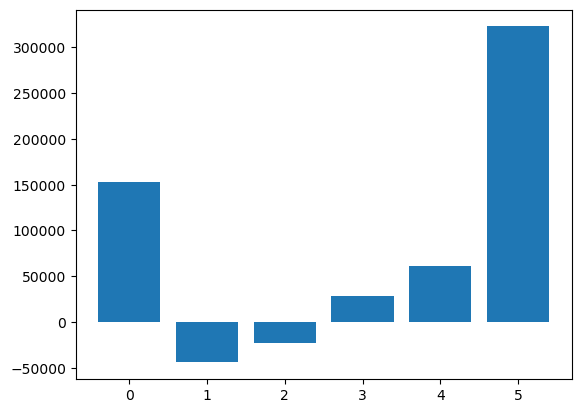

In [213]:
plt.bar(range(len(coefficients)), coefficients)

In [214]:
columns

Index(['year', 'km_driven', 'seats', 'mileage', 'engine', 'max_power'], dtype='object')

Самым информативным оказался 5 признак - max_power

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [215]:
from sklearn.linear_model import Lasso

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [216]:
## Подберем необходимый коэффициент а, чтобы получить максимальное качество модели
for a in np.arange(0.1, 10, 0.45):
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)

    y_pred_train = lasso.predict(X_train)
    y_pred_test = lasso.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', MSE(y_train, y_pred_train))
    print('Train R^2:', r2_score(y_train, y_pred_train))
    
    print('Test MSE:', MSE(y_test, y_pred_test))
    print('Test R^2:', r2_score(y_test, y_pred_test))
    
    print(lasso.coef_,'\n')

alpha=0.1
Train MSE: 116920237892.74123
Train R^2: 0.5920983963186435
Test MSE: 234079511811.29254
Test R^2: 0.5927837795891897
[ 6.38377468e+05 -2.19286828e+09 -2.33647791e+04  1.10367352e+05
  2.84085800e+07  1.02400978e+07] 

alpha=0.55
Train MSE: 118268194197.0322
Train R^2: 0.5873957584509624
Test MSE: 238210731478.3623
Test R^2: 0.5855969068659281
[ 6.95673118e+05 -1.24780381e+08 -2.59179959e+04  8.98739736e+04
  2.25540894e+07  1.03625544e+07] 

alpha=1.0000000000000002
Train MSE: 118409797096.44666
Train R^2: 0.5869017460302035
Test MSE: 238498117165.81424
Test R^2: 0.5850969566031359
[  699014.19045047       -0.           -25728.88821898    88111.30517811
 21828636.58461834 10381919.21911705] 

alpha=1.4500000000000002
Train MSE: 118410738706.29764
Train R^2: 0.5868984610200532
Test MSE: 238504625457.91467
Test R^2: 0.5850856344584083
[  698890.8731469        -0.           -25363.56320939    87550.94944807
 21432405.15944486 10394667.33932094] 

alpha=1.9000000000000004
Train 

`При alpha = 1 качество модели чуть ухудшилось, однако удалось занулить 2 коэффициент. Можно удалить 2 столбец без большой потери в качестве`

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [217]:
from sklearn.model_selection import GridSearchCV

In [218]:
alphas = np.logspace(-4, 100, num=100)

# Модель Lasso
lasso = Lasso()

# Параметры для поиска
param_grid = {'alpha': alphas}

model = Lasso()
grid_search = GridSearchCV(model, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Вывод наилучших гиперпараметров и оценки
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'alpha': 1.592282793341094}
Best Cross-Validation Score: 0.5727281556114707


#####  GridSearchCV обучил 1000 моделей (num(100)*cv(10))
Лучшее значение alpha  1.592. Занулился 2 коэффициент:

In [219]:
best_model = grid_search.best_estimator_
print("Модель:", best_model)
print( "Коэффициенты:", *best_model.coef_)

Модель: Lasso(alpha=1.592282793341094)
Коэффициенты: 698852.0202924148 -0.0 -25247.96843088717 87373.38919160311 21307040.232858542 10398699.79422156


In [220]:
## Обучим модель на полученных коэффициентах и посмотрим на качество модели
lasso = Lasso(alpha = 1.592282793341094)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print('Train MSE:', MSE(y_train, y_pred_train))
print('Train R^2:', r2_score(y_train, y_pred_train))
    
print('Test MSE:', MSE(y_test, y_pred_lasso))
print('Test R^2:', r2_score(y_test, y_pred_lasso))

Train MSE: 118486895319.84265
Train R^2: 0.5866327721593749
Test MSE: 238506762194.24075
Test R^2: 0.5850819172869055


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [221]:
from sklearn.linear_model import ElasticNet

In [222]:
alphas = np.logspace(-1, 0, num=20)
l1_ratio = np.arange(0.01,1.001, 0.09)
max_iter = [300, 400, 500]
param_grid = {'alpha': alphas, 'l1_ratio': l1_ratio, 'max_iter':max_iter}

EN = ElasticNet()
grid_search = GridSearchCV(EN, param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([0.1       , 0.11288379, 0.1274275 , 0.14384499, 0.16237767,
       0.18329807, 0.20691381, 0.23357215, 0.26366509, 0.29763514,
       0.33598183, 0.37926902, 0.42813324, 0.48329302, 0.54555948,
       0.61584821, 0.6951928 , 0.78475997, 0.88586679, 1.        ]),
                         'l1_ratio': array([0.01, 0.1 , 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91,
       1.  ]),
                         'max_iter': [300, 400, 500]})

In [223]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'alpha': 0.37926901907322497, 'l1_ratio': 1.0, 'max_iter': 300}
Best Cross-Validation Score: 0.5738610645236378


Grid_search обучил 660 моделей
Лучшие гиперпараметры: 'alpha': 0.37926901907322497, 'l1_ratio': 1.0, 'max_iter': 300}

In [224]:
## Обучим эту модель и посмотрим ошибку

EN = ElasticNet(alpha = 0.37926901907322497, l1_ratio = 1.0, max_iter = 300)

EN.fit(X_train, y_train)

y_pred_train = EN.predict(X_train)
y_pred_test_en = EN.predict(X_test)


print('Train MSE:', MSE(y_train, y_pred_train))
print('Train R^2:', r2_score(y_train, y_pred_train))
    
print('Test MSE:', MSE(y_test, y_pred_test_en))
print('Test R^2:', r2_score(y_test, y_pred_test_en))

Train MSE: 117537048954.25166
Train R^2: 0.5899465171769903
Test MSE: 236524297384.5573
Test R^2: 0.5885307104796541


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [225]:
df_train.drop(columns = 'name', inplace = True)

In [226]:
df_test.drop(columns = 'name', inplace = True)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**
/
- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [228]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

onehotencoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [229]:
columns_ohe = ['fuel', 'seller_type','transmission', 'owner', 'seats']

df_train_ohe = df_train[columns_ohe]

onehotencoder.fit(df_train_ohe)

new_column_names = onehotencoder.get_feature_names_out()

In [230]:
new_column_names

array(['fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_2', 'seats_4',
       'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10',
       'seats_14'], dtype=object)

In [231]:
df_train_new = pd.DataFrame(
    onehotencoder.transform(df_train_ohe),
    columns=new_column_names,
    index=df_train_ohe.index  # Используем тот же индекс, что и у исходного DataFrame
)

In [232]:
df_train_real = df_train.select_dtypes(include = ['int', 'float']).copy()
df_train_real.drop(columns = 'seats', inplace = True)

In [233]:
df_train = df_train_real.join(df_train_new)

In [234]:
df_train.columns

Index(['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_2', 'seats_4',
       'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10',
       'seats_14'],
      dtype='object')

### Сделаем то же самое для теста

In [235]:
df_test_ohe = df_test[columns_ohe]

## Получим датасет с закодированными столбцами
df_test_new = pd.DataFrame(
    onehotencoder.transform(df_test_ohe),
    columns=new_column_names,
    index=df_test_ohe.index  # Используем тот же индекс, что и у исходного DataFrame
)

## Отберем некатегориальные данные
df_test_real = df_test.select_dtypes(include = ['int', 'float']).copy()
df_test_real.drop(columns = 'seats', inplace = True)

## Объединим таблицы
df_test = df_test_real.join(df_test_new)

In [237]:
df_test

,year,selling_price,km_driven,mileage,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Third Owner,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2010,229999,168000,14.00,"2,498.00",112.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,2017,665000,25000,21.50,"1,497.00",108.50,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2007,175000,218463,12.90,"1,799.00",130.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2015,635000,173000,25.10,"1,498.00",98.60,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2011,130000,70000,16.50,"1,172.00",65.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,250000,100000,19.81,"1,086.00",68.05,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
996,2017,440000,50000,18.60,"1,197.00",81.83,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
997,2009,340000,40000,23.00,"1,396.00",90.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
998,2012,350000,25000,20.36,"1,197.00",78.90,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [239]:
## Разделим целевую переменную и матрицу признаков в разные датасеты
y_train = df_train['selling_price']
X_train = df_train.drop(columns = 'selling_price')
y_test = df_test['selling_price']
X_test = df_test.drop(columns = 'selling_price')

In [244]:
X_test

,year,km_driven,mileage,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,...,owner_Third Owner,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2010,168000,14.00,"2,498.00",112.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,2017,25000,21.50,"1,497.00",108.50,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2007,218463,12.90,"1,799.00",130.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2015,173000,25.10,"1,498.00",98.60,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2011,70000,16.50,"1,172.00",65.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,100000,19.81,"1,086.00",68.05,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
996,2017,50000,18.60,"1,197.00",81.83,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
997,2009,40000,23.00,"1,396.00",90.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
998,2012,25000,20.36,"1,197.00",78.90,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [241]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer

ridge = Ridge()

# Генерация коэффициента alpha
alphas = np.logspace(-1, 1, num=25)

# Создание функции оценки
scoring = make_scorer(r2_score)

# Перечисление параметров
param_grid = {'alpha': alphas}

# Кросс-валидационный поиск
grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring=scoring)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'alpha': 8.254041852680182}
Best Cross-Validation Score: 0.6213751687773529


In [242]:
# Обучим модель
ridge_r = Ridge(alpha = 8.3)

ridge_r.fit(X_train, y_train)

y_pred_ridge = ridge_r.predict(X_test)

print('r2_score:', r2_score(y_test, y_pred_ridge))

r2_score: 0.6448193398814482


### Попробуем нормализовать признаки перед обучением модели ###

In [243]:
from sklearn.preprocessing import StandardScaler

## Обучим и применим StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

columns = X_train.columns
X_train_norm = pd.DataFrame(scaler.transform(X_train), columns = columns)

columns = X_test.columns
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns = columns)


## Применим GridSearchCV
ridge = Ridge()

# Генерация коэффициента alpha
#alphas = np.arange(0.01,10 , 0.1)
alphas = np.logspace(-1, 1, num=25)

# Создание функции оценки
scoring = make_scorer(r2_score)

# Перечисление параметров
param_grid = {'alpha': alphas}

# Кросс-валидационный поиск
grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring=scoring)

grid_search.fit(X_train_norm, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'alpha': 10.0}
Best Cross-Validation Score: 0.6167270945819446


`Нормализация не дала лучших результатов`

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [117]:
def business_metric(y_true, y_pred):
    k = 0
    for i in range(len(y_true)):
        if abs(y_pred[i] - y_true[i])/(y_true[i]) < 0.1:
            k = k +1
    return k/len(y_true)

business_metric(y_test, y_pred_ridge)

0.248

### Применим функцию business_metric ко всем обученным моделям ###

In [119]:
## LinearRegression - ln()
print('LinearRegression_r2:', r2_score(y_test, y_pred_ln))
print('business_metric:', business_metric(y_test, y_pred_ln),'\n')


## LinearRegression + StandartScaler 
print('LinearRegression_St_r2:', r2_score(y_test, y_pred_ln_st))
print('business_metric:', business_metric(y_test, y_pred_ln_st),'\n')

#Lasso
print('Lasso_r2:', r2_score(y_test, y_pred_lasso))
print('business_metric:', business_metric(y_test, y_pred_lasso),'\n')

# ElasticNet
print('ElasticNet_r2:', r2_score(y_test, y_pred_test_en))
print('business_metric:', business_metric(y_test, y_pred_test_en),'\n')

# Ridge
print('Ridge_r2:', r2_score(y_test, y_pred_ridge))
print('business_metric:', business_metric(y_test, y_pred_ridge),'\n')

LinearRegression_r2: 0.5941419794788385
business_metric: 0.227 

LinearRegression_St_r2: 0.5941419794788517
business_metric: 0.227 

Lasso_r2: 0.5850819172869055
business_metric: 0.232 

ElasticNet_r2: 0.5885307104796541
business_metric: 0.233 

Ridge_r2: 0.6448193398814482
business_metric: 0.248 



`Лучше всего с поставленной задачей из моделей, которые мы обучили, справляетя модель Ridge`

### Попробуем обучить модели на одинаковых данных, чтобы сравнить качество ###

In [118]:
## Линейная регрессия
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
print('LinearRegression_r2:', r2_score(y_test, y_pred))
print('business_metric:', business_metric(y_test, y_pred),'\n')

## Лассо
lasso = Lasso(alpha = 1.59, max_iter = 5000)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('Lasso_r2:', r2_score(y_test, y_pred))
print('business_metric:', business_metric(y_test, y_pred),'\n')

## ElasticNet

EN = ElasticNet(alpha = 0.37926901907322497, l1_ratio = 1.0, max_iter = 5000)
EN.fit(X_train, y_train)
y_pred = EN.predict(X_test)
print('ElasticNet', r2_score(y_test, y_pred))
print('business_metric:', business_metric(y_test, y_pred),'\n')

## Ridge у нас уже обученная
print('Ridge_r2:', r2_score(y_test, y_pred_ridge))
print('business_metric:', business_metric(y_test, y_pred_ridge),'\n')

LinearRegression_r2: 0.6259063782347468
business_metric: 0.249 

Lasso_r2: 0.6259343444886329
business_metric: 0.249 

ElasticNet 0.6259130342550114
business_metric: 0.249 

Ridge_r2: 0.6448193398814482
business_metric: 0.248 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.957e+13, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(


In [121]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

## Лучшая модель - Ridge

In [238]:
import pickle

to_save = {'model': ridge_r, 'encoder': onehotencoder}

with open('model.pikle', 'wb') as file:
    pickle.dump(to_save, file)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

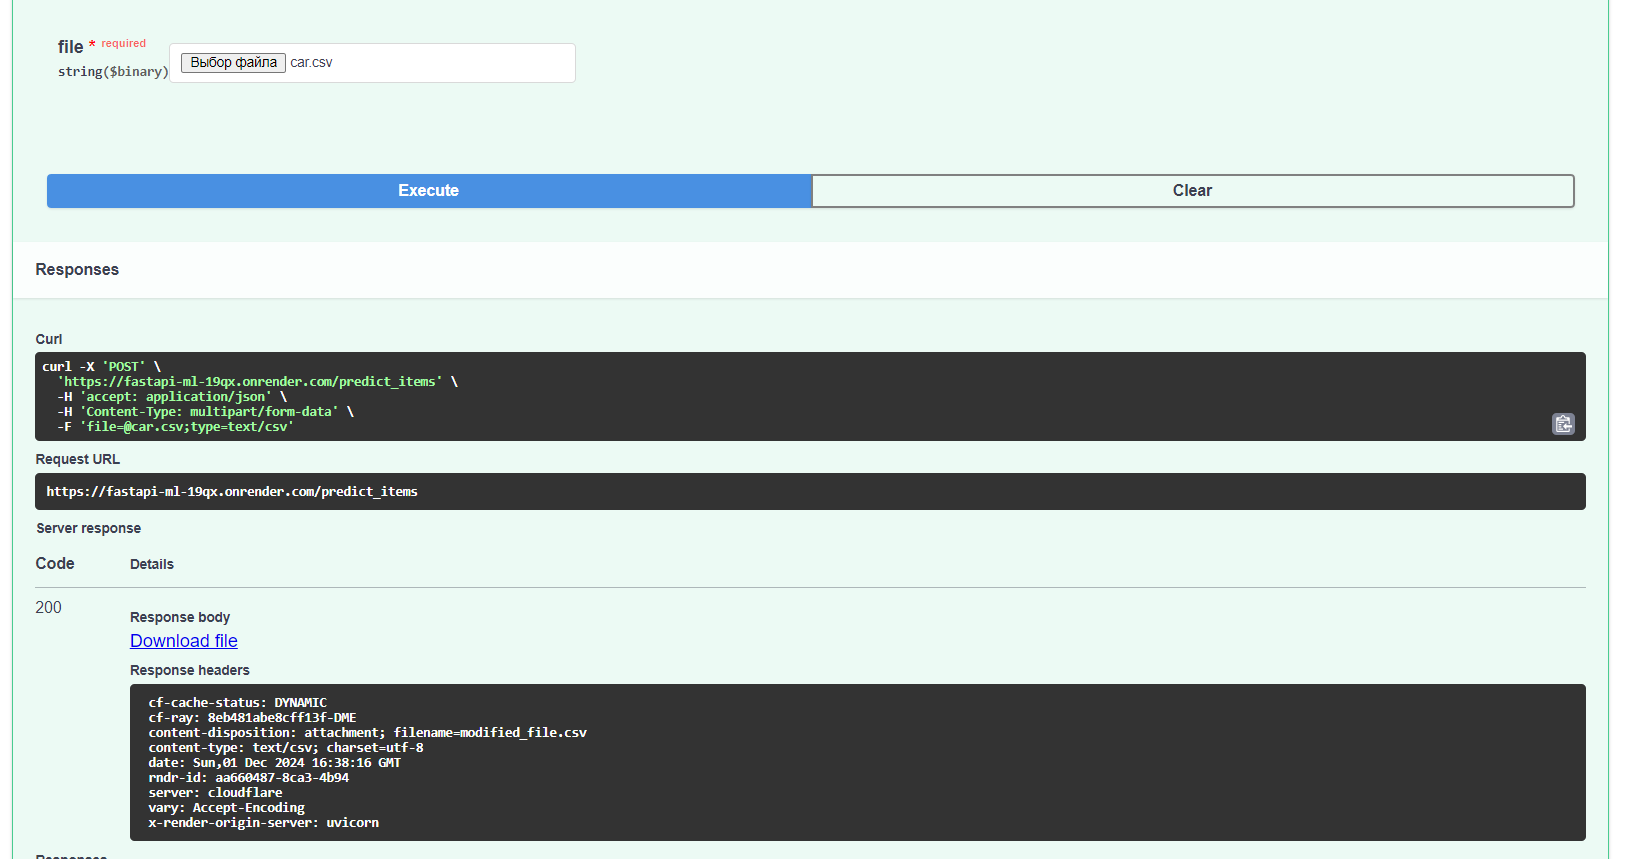
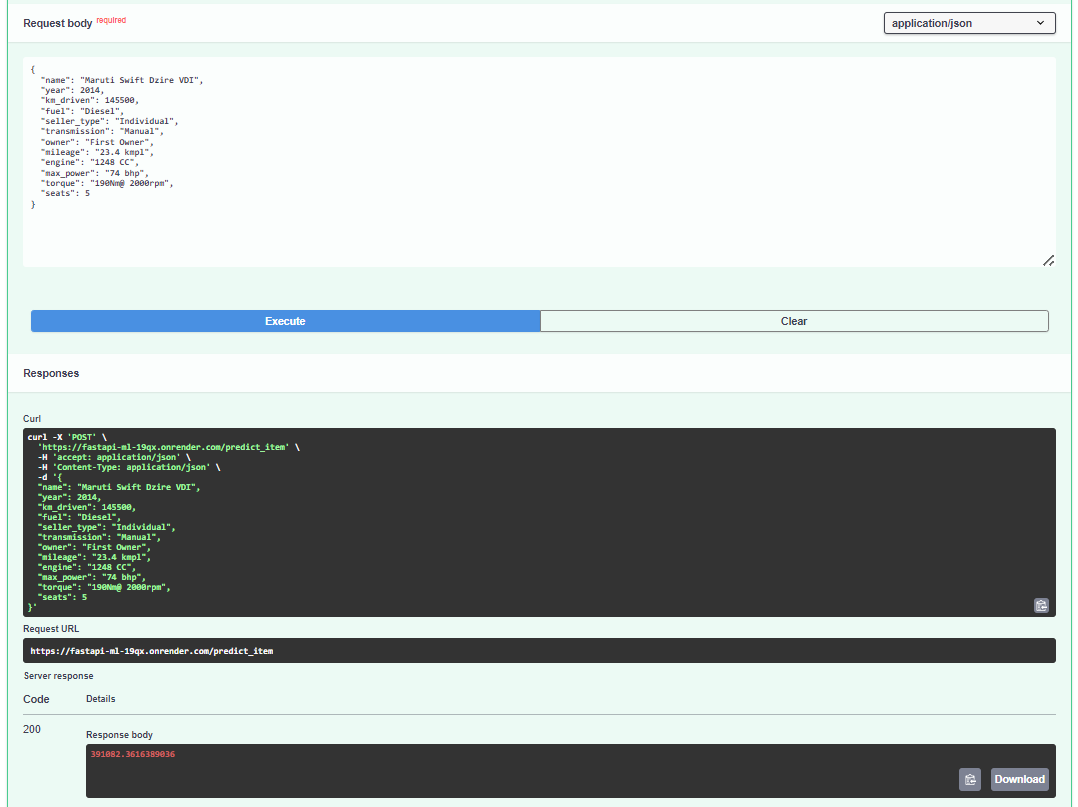


# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



***Это кот Сабрины***